In [21]:
%load_ext tensorboard

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from datetime import datetime

In [3]:
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 0])
Y_train = np.reshape(y, (y.shape[0], 1))

In [4]:
X_train

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [5]:
Y_train

array([[0],
       [1],
       [1],
       [0]])

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_dim=2),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='mse',
             optimizer='sgd',
             metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [26]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
history = model.fit(X_train, Y_train, 
         batch_size=1,
         epochs=20,
         callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0379 - mse: 0.0379
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0379 - mse: 0.0379
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0377 - mse: 0.0377
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0376 - mse: 0.0376
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0375 - mse: 0.0375
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0374 - mse: 0.0374
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0374 - mse: 0.0374
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0374 - mse: 0.0374
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0374 - mse: 0.0374
Epoch 10/20
4/4 [==============================] - 0s 5ms/step - loss: 0.0372 - mse: 0.0372
Epoch 11/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0372 - mse: 0.03

In [28]:
print("Average test loss: ", np.average(history.history['loss']))

Average test loss:  0.037167320400476454


In [29]:
%tensorboard --logdir logs/scalars

In [32]:
print(model.predict(X_train))
print(model.predict(X_train).round())

1/1 [==============================] - 0s 19ms/step
[[0.1674468 ]
 [0.76457065]
 [0.76475084]
 [0.08040403]]
1/1 [==============================] - 0s 18ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


Text(0.5, 1.0, 'Train - Accuracy')

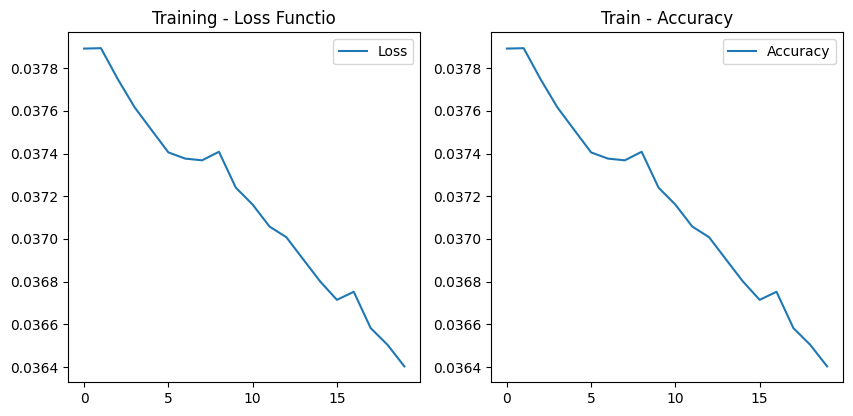

In [31]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Training - Loss Functio')

plt.subplot(2,2,2)
plt.plot(history.history['mse'], label='Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## Journalisation des scalaires personnalisés

In [34]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
file_writer = tf.summary.create_file_writer(logdir + "/metrics")
file_writer.set_as_default()

def lr_schedule(epoch):
  """
  Returns a custom learning rate that decreases as epochs progress.
  """
  learning_rate = 0.2
  if epoch > 10:
    learning_rate = 0.02
  if epoch > 20:
    learning_rate = 0.01
  if epoch > 50:
    learning_rate = 0.005

  tf.summary.scalar('learning rate', data=learning_rate, step=epoch)
  return learning_rate

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_dim=2),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='mse',
             optimizer='sgd',
             metrics=['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(
    X_train, Y_train,
    batch_size=1,
    verbose=0, # Suppress chatty output; use Tensorboard instead
    epochs=1000,
    callbacks=[tensorboard_callback, lr_callback],
)

In [42]:
%tensorboard --logdir logs/scalars

Reusing TensorBoard on port 6006 (pid 34364), started 0:24:10 ago. (Use '!kill 34364' to kill it.)

Text(0.5, 1.0, 'Train - Accuracy')

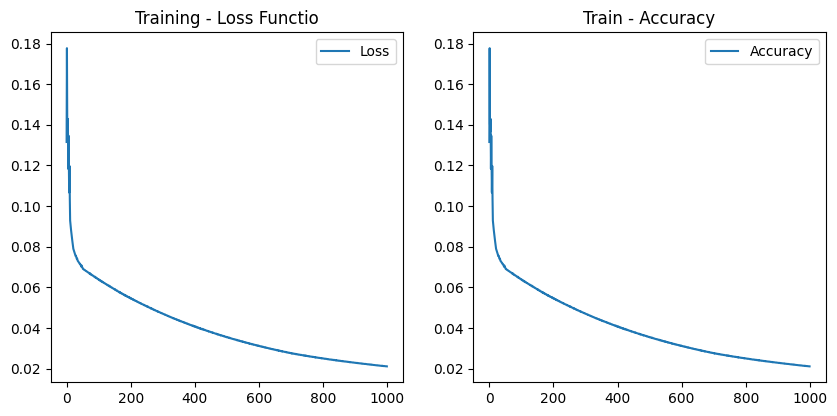

In [43]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Training - Loss Functio')

plt.subplot(2,2,2)
plt.plot(history.history['mse'], label='Accuracy')
plt.legend()
plt.title('Train - Accuracy')